In [32]:
import matplotlib.pyplot as plt
import numpy as np

C = 1500 # for a better representation in figure
f = 20
N = 18
d = np.array([15]) * np.ones([N,1]) # sensor distance
lmbda = C / f
n = np.arange(0,N,1).reshape([-1,1]) # N array from 0 to N-1

In [33]:
# gen sig

theta = -10 # signal incoming direction
theta = theta / 180 * np.pi # degree to radian
x = np.exp(1j * 2 * np.pi * np.sin(theta) * n * d / lmbda) # a vector, array response
Rx = np.mat(1000 * np.dot(x, np.transpose(np.conj(x))) + 1 * np.eye(N)) # CSM

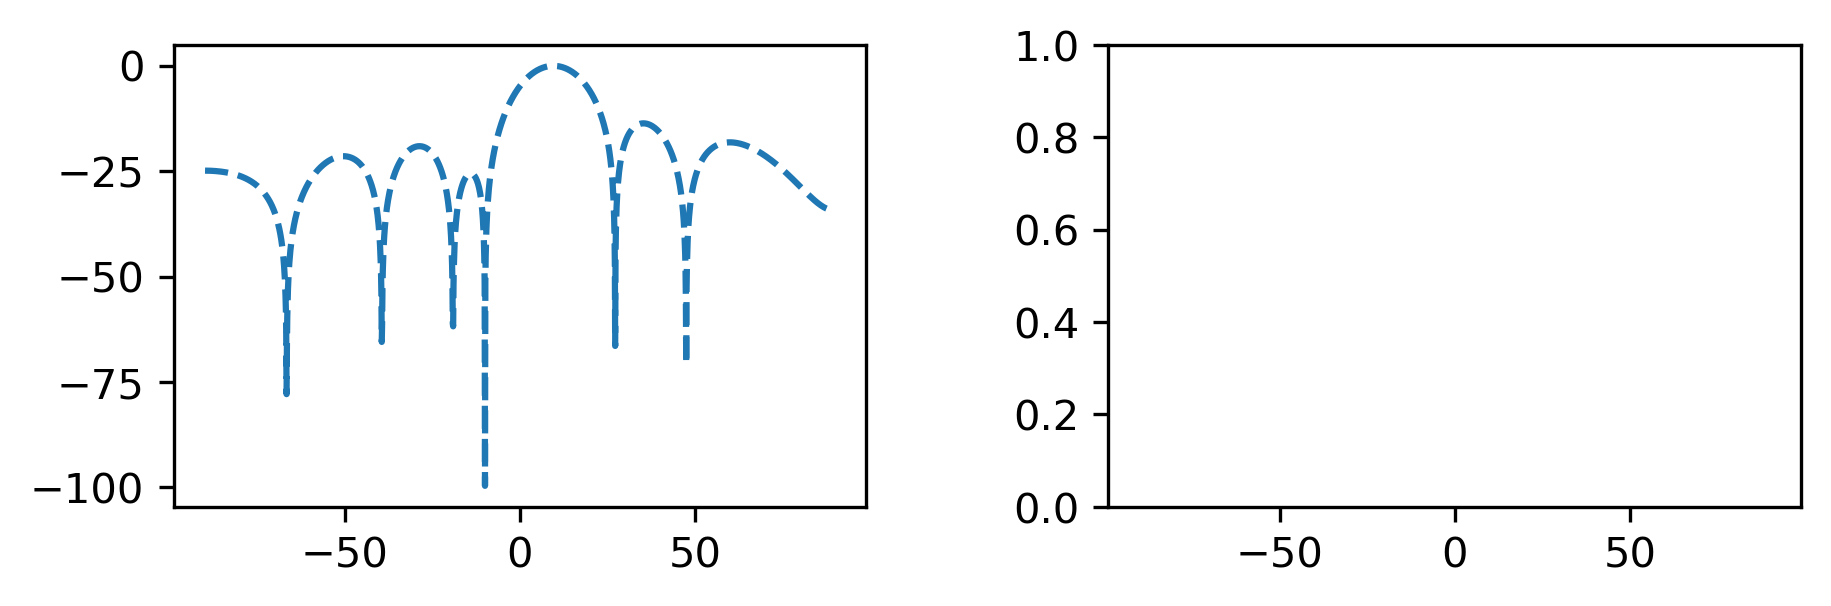

In [34]:
theta = np.arange(-90, 90, 0.1).reshape([1, -1])
theta_0 = 10 # look direction
theta = theta / 180 * np.pi
theta_0 = theta_0 / 180 * np.pi

a = np.mat(np.exp(1j * 2* np.pi * np.sin(theta) * n * d / lmbda)) 
a_theta_0 = np.mat(np.exp(1j * 2* np.pi * np.sin(theta_0) * n * d / lmbda)) # my fucking steering vector
w = Rx.I * a_theta_0 / (a_theta_0.H * Rx.I * a_theta_0) # Rx.I is the inverse of itself. BTW, w is the weighting vector, the transfer function, the beamformer!

B = w.H * a
B = np.abs(B) / np.max(np.abs(B)) # normalization

fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(7, 2), dpi=300)
plt.subplots_adjust(wspace=0.35, hspace=0.05)

ax[0].plot(theta.reshape([-1, 1]) * 180 / np.pi, 20 * np.log10(B.reshape([-1, 1])), '--')

# # direction estimation
# theta_0 = np.arange(-90, 90, 0.1).reshape([1, -1])
# theta_0 = theta_0 / 180 * np.pi

# sigma = []
# for i in range(theta_0.shape[1]):
#     a_theta_0 = np.mat(np.exp(1j * 2* np.pi * np.sin(theta_0[:, i]) * n * d / lmbda))
#     sigma.append(1 / (a_theta_0.H * Rx.I * a_theta_0))

# signal = np.array(sigma).reshape([-1, 1])

# ax[1].plot(theta_0.reshape([-1, 1]) * 180 / np.pi, 10 * np.log10(sigma).reshape([-1, 1]))
plt.show()